# Import libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Reading data

In [78]:
df= pd.read_csv("C:\\Users\\hpc\\Desktop\\dash\\Dash_proj\\data\\DataScience_salaries_2024.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


# EDA

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [80]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [81]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,149874.718763,32.760480
std,0.700799,3.562354e+05,69009.181349,46.488278
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [82]:
df.work_year.value_counts()

work_year
2023    8519
2024    4374
2022    1652
2021     218
2020      75
Name: count, dtype: int64

In [83]:
df['experience_level'].value_counts() # Most employee in this data are seniors

experience_level
SE    9696
MI    3553
EN    1148
EX     441
Name: count, dtype: int64

In [84]:
df.employment_type.value_counts() #Most employee in this data work full time

employment_type
FT    14772
PT       27
CT       26
FL       13
Name: count, dtype: int64

In [85]:
df.company_size.value_counts()

company_size
M    13674
L      983
S      181
Name: count, dtype: int64

In [86]:
df.remote_ratio.value_counts()

remote_ratio
0      9853
100    4737
50      248
Name: count, dtype: int64

In [87]:
df.salary_currency.value_counts()

salary_currency
USD    13682
GBP      567
EUR      424
INR       53
CAD       51
AUD       12
CHF        8
PLN        7
SGD        6
BRL        4
JPY        4
HUF        3
TRY        3
DKK        3
THB        2
NOK        2
NZD        1
CLP        1
ZAR        1
MXN        1
PHP        1
ILS        1
HKD        1
Name: count, dtype: int64

In [88]:
# We will work with US dollar currency for this data, so I will delete the salary column.
df.drop('salary', inplace= True, axis=1)
df.head(3)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,HUF,35735,HU,50,HU,L


In [89]:
print(df.job_title.nunique())

153


In [90]:
df.job_title.value_counts().head(10)

job_title
Data Engineer                     3162
Data Scientist                    3015
Data Analyst                      2189
Machine Learning Engineer         1542
Research Scientist                 475
Analytics Engineer                 403
Applied Scientist                  383
Data Architect                     369
Research Engineer                  276
Business Intelligence Engineer     230
Name: count, dtype: int64

In [91]:
# The average salary of the top 10 job titles in US dollars
df.groupby('job_title')['salary_in_usd'].mean().head(10)

job_title
AI Architect             255142.357143
AI Developer             135466.789474
AI Engineer              164842.371429
AI Product Manager       141766.666667
AI Programmer             62042.000000
AI Research Engineer      82963.000000
AI Research Scientist    119444.000000
AI Scientist             120578.875000
AI Software Engineer     174100.000000
AWS Data Architect       258000.000000
Name: salary_in_usd, dtype: float64

In [92]:
df.groupby('job_title')['salary_in_usd'].min().head(10)

job_title
AI Architect              99750
AI Developer              33333
AI Engineer               21593
AI Product Manager        93300
AI Programmer             30000
AI Research Engineer      24322
AI Research Scientist     88888
AI Scientist              18053
AI Software Engineer     106200
AWS Data Architect       258000
Name: salary_in_usd, dtype: int64

In [93]:
df.groupby('work_year')['salary_in_usd'].mean()

work_year
2020    102250.866667
2021     99922.073394
2022    134404.072034
2023    153732.664632
2024    151510.094422
Name: salary_in_usd, dtype: float64

# Data visualization

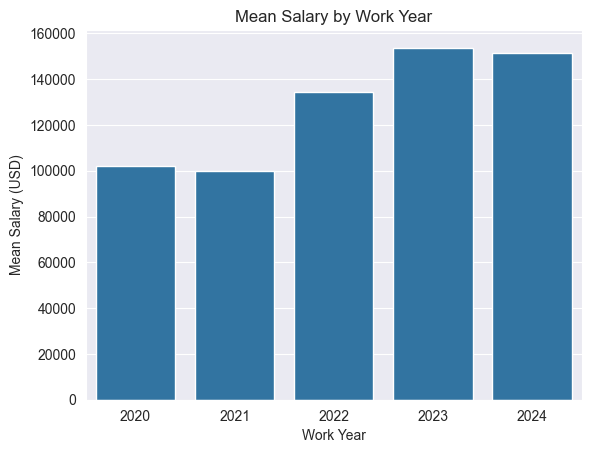

In [94]:
grouped_data = df.groupby('work_year')['salary_in_usd'].mean()

# Creating the plot using Seaborn
sns.barplot(x=grouped_data.index, y=grouped_data.values)

# Adding labels and title to the plot
plt.xlabel('Work Year')
plt.ylabel('Mean Salary (USD)')
plt.title('Mean Salary by Work Year')

# Displaying the plot
plt.show()

### From this we can get some notes and insights 
* The average salary increases over the years, with a significant jump from 2021 to 2022 and another increase in 2023 and 2024. This could indicate a positive trend in the job market or a growing demand for skilled professionals.
* The lowest average salary is observed in 2021, which might be due to various factors such as the impact of the COVID-19 pandemic on the economy or changes in the company's financial situation.
* The highest average salary is expected in 2024, with a considerable increase from the previous years. This could be due to the company's strategic growth plans, inflation adjustments, or other economic factors.


In [95]:
df.groupby('experience_level')['salary_in_usd'].mean()

experience_level
EN     91656.841463
EX    194730.210884
MI    125386.553054
SE    163700.967100
Name: salary_in_usd, dtype: float64

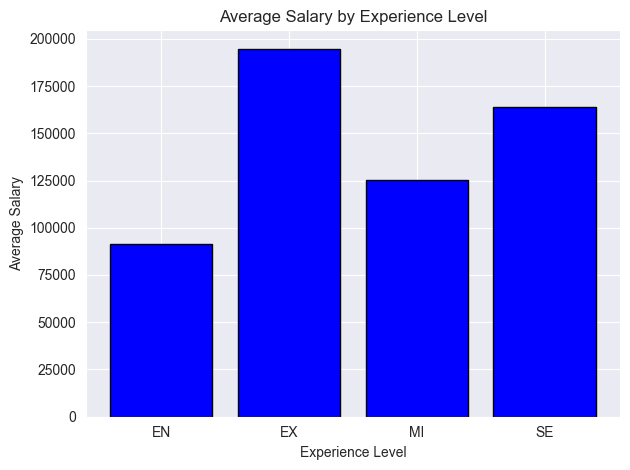

In [96]:
average_salary_by_level = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

plt.bar(average_salary_by_level['experience_level'],average_salary_by_level['salary_in_usd'],color='blue',edgecolor='black')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.title('Average Salary by Experience Level')

plt.tight_layout()
plt.show()

* This data suggests that experience level is a major factor in determining salary, with more experienced professionals earning higher salaries.

In [97]:
top_jobs_title = df['job_title'].value_counts().head(10)
top_jobs_title

job_title
Data Engineer                     3162
Data Scientist                    3015
Data Analyst                      2189
Machine Learning Engineer         1542
Research Scientist                 475
Analytics Engineer                 403
Applied Scientist                  383
Data Architect                     369
Research Engineer                  276
Business Intelligence Engineer     230
Name: count, dtype: int64

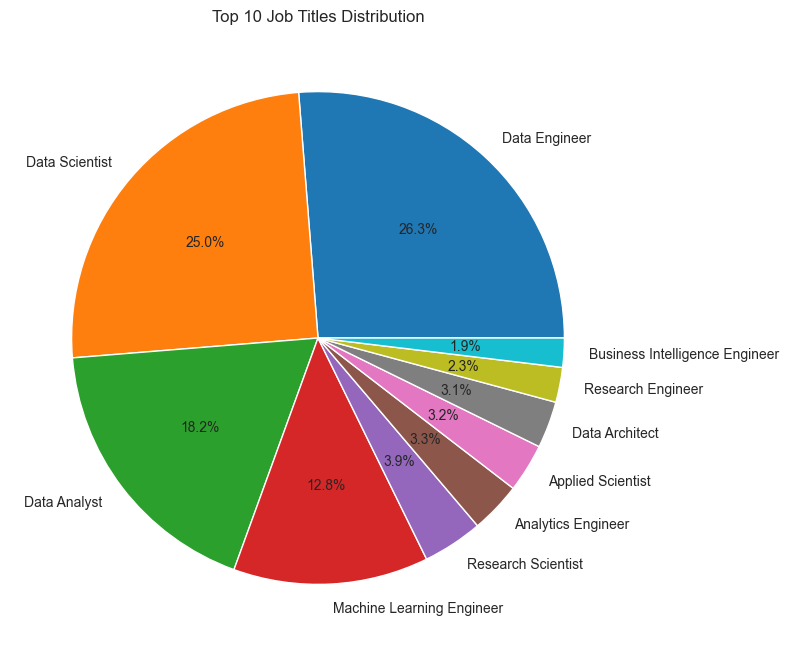

In [98]:
plt.figure(figsize=(8, 8))
plt.pie(top_jobs_title, labels=top_jobs_title.index, autopct='%1.1f%%')
plt.title(f'Top 10 Job Titles Distribution')
plt.show()

# Data Preprocessing

In [100]:
# Drop unnecessary columns
data = df.drop(['employee_residence', 'company_location'], axis=1)

In [107]:
# Split the data into features (X) and target variable (y)
X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']

In [140]:
X

,work_year,experience_level,employment_type,job_title,salary_currency,remote_ratio,company_size
0,2021,MI,FT,Data Scientist,CLP,100,L
1,2021,MI,FT,BI Data Analyst,HUF,50,L
2,2020,MI,FT,Data Scientist,HUF,50,L
3,2021,MI,FT,ML Engineer,JPY,50,S
4,2022,SE,FT,Lead Machine Learning Engineer,INR,50,L
...,...,...,...,...,...,...,...
14833,2022,MI,FT,Business Intelligence Developer,USD,100,M
14834,2020,EX,FT,Staff Data Analyst,USD,0,M
14835,2021,EN,FT,Machine Learning Developer,USD,100,L
14836,2022,EN,FT,Data Analyst,USD,0,L


In [108]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# List of numerical and categorical columns
num_cols = ['work_year', 'remote_ratio']
cat_cols = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'company_size']

# Define the preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))   # One-hot encode categorical features
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])



In [109]:
import joblib

# Assuming you have your data loaded in a variable named 'data'
# Fit the preprocessing pipeline on your data
preprocessor.fit(X)

# Save the preprocessing pipeline to a file
joblib.dump(preprocessor, 'preprocessor_pipeline.pkl')


['preprocessor_pipeline.pkl']

In [ ]:
# Split the data into features (X) and target variable (y)
X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']

In [139]:
data['salary_currency'].unique()

array(['CLP', 'HUF', 'JPY', 'INR', 'ILS', 'NOK', 'THB', 'PHP', 'USD',
       'MXN', 'ZAR', 'HKD', 'CAD', 'TRY', 'GBP', 'EUR', 'DKK', 'CHF',
       'NZD', 'PLN', 'BRL', 'AUD', 'SGD'], dtype=object)

In [ ]:
cat_cols = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'company_size']

Output("prediction-placeholder", "children"),
    Input("deploy-button", "n_clicks"),
    State("deploy-job-menu", "value"),
    State("deploy-experience-menu", "value"),
    State("deploy-education-menu", "value"),
    State("deploy-company-size", "value"),
    State("deploy-industry-menu", "value"),
    State("deploy-location-menu", "value"),
    State("deploy-experience-years", "value"),

In [110]:
preprocessor = joblib.load('preprocessor_pipeline.pkl')
transformed_data = preprocessor.transform(X).toarray()
transformed_data

array([[-3.05219266,  1.44642454,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-3.05219266,  0.37084835,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-4.47918433,  0.37084835,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-3.05219266,  1.44642454,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-1.62520099, -0.70472784,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-4.47918433,  1.44642454,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

# Splitting Data

In [112]:
transformed_data

array([[-3.05219266,  1.44642454,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-3.05219266,  0.37084835,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-4.47918433,  0.37084835,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-3.05219266,  1.44642454,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-1.62520099, -0.70472784,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-4.47918433,  1.44642454,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [123]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(transformed_data, y, test_size=0.2, random_state=42)

In [124]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((11870, 189), (2968, 189), (11870,), (2968,))

In [125]:
X_train

array([[-3.05219266,  1.44642454,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.19820932, -0.70472784,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.22878236, -0.70472784,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.22878236,  1.44642454,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.22878236, -0.70472784,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.22878236, -0.70472784,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [126]:
#X_train.to_csv("deploy.csv",index=False)

In [127]:
X_test

array([[-0.19820932,  0.37084835,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.19820932, -0.70472784,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.19820932, -0.70472784,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.19820932, -0.70472784,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.19820932,  1.44642454,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.19820932,  1.44642454,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

# ML models

## Model initialization

In [128]:
decision_tree_model = DecisionTreeRegressor(max_depth=10)
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)

In [129]:
def predict_salary(model, X_train, y_train, X_test, y_test):
    # Model training
    model.fit(X_train, y_train)

    # Model evaluation
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)


    return mse,r2,mae

In [130]:
X_train

array([[-3.05219266,  1.44642454,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.19820932, -0.70472784,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.22878236, -0.70472784,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.22878236,  1.44642454,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.22878236, -0.70472784,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.22878236, -0.70472784,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [131]:
gradient_boosting_model.fit(X_train, y_train)
y_pred = gradient_boosting_model.predict(X_test)
y_pred


array([102914.91329347, 107718.23584219, 107718.23584219, ...,
       196639.82566409, 164618.88841398, 169953.42345424])

### Predict using Decision Tree Regression

In [132]:
from sklearn.metrics import mean_absolute_error

decision_tree_mse,decision_tree_r2,mae = predict_salary(decision_tree_model, X_train, y_train, X_test, y_test)
print("Decision Tree Regression:")
print("R-squared:", decision_tree_r2)
print("MSE:", decision_tree_mse)
print(f"Mean Absolute Error (MAE): {mae}")


Decision Tree Regression:
R-squared: 0.2912314954090617
MSE: 3399716995.0047708
Mean Absolute Error (MAE): 41007.574892889344


### Predict using Random Forest Regression

In [133]:
random_forest_mse, random_forest_r2,mae = predict_salary(random_forest_model, X_train, y_train, X_test, y_test)
print("Random Forest Regression:")
print("R-squared:", random_forest_r2)
print("MSE:", random_forest_mse)

Random Forest Regression:
R-squared: 0.31268674171444777
MSE: 3296803610.6995068


### Predict using Gradient Boosting Regression

In [134]:
gradient_boosting_mse, gradient_boosting_r2,mae = predict_salary(gradient_boosting_model, X_train, y_train, X_test, y_test)
print("Gradient Boosting Regression:")
print("R-squared:", gradient_boosting_r2)
print("MSE:", gradient_boosting_mse)

Gradient Boosting Regression:
R-squared: 0.33338638985999514
MSE: 3197514569.023408


In [135]:
import pickle

# Save the model to a file
with open('model_.pkl', 'wb') as f:
    pickle.dump(gradient_boosting_model, f)


In [136]:
from joblib import load

model = load('model_.pkl')


In [38]:
gradient_boosting_mse, gradient_boosting_r2,mae = predict_salary(model, X_train, y_train, X_test, y_test)
gradient_boosting_mse, gradient_boosting_r2,mae

(3179998150.867388, 0.3370381895599329, 39903.61127082076)

In [80]:
input_data = {
    "work_year":1,
    "experience_level":2,
    "employment_type":6,
    "job_title": 4,
    "salary_currency":6,
    "remote_ratio":1.4,
    "company_size":7
}

input_df = pd.DataFrame([input_data])

# Perform prediction
predicted_salary = model.predict(input_df)[0]
y_pred

52406.28370062256

In [70]:
input_df.shape

(1, 7)

In [72]:
y_pred = model.predict(input_df)
y_pred

array([52406.28370062])